In [ ]:
!pip install pyreadstat
import pandas as pd
df = pd.read_spss('Addiction_SBU_Psychology_means.sav')
df.to_csv('addiction_full.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install xgboost
!pip install CMake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from keras.layers import Dense
from tensorflow import keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv('addiction_full.csv')
df.head()

,Unnamed: 0,code,age,edu,field,Bcity,Lcity,gender,marital_parents,Fedu,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,16,19.0,bachelor,NaN,small city,small city,NaN,married,MA,...,1.0,1.000000,2.800000,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,43,33.0,master,NaN,other,tehran,NaN,deadM,BA,...,2.0,2.000000,2.000000,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,67,21.0,bachelor,NaN,NaN,NaN,NaN,married,diplom,...,2.0,1.666667,3.100000,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,75,NaN,NaN,NaN,NaN,NaN,NaN,married,NaN,...,1.0,1.333333,2.700000,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,4,133,24.0,master,science,big city,NaN,NaN,NaN,school,...,NaN,NaN,2.555556,2.833333,2.818182,3.125000,2.625000,3.937500,NaN,NaN


In [ ]:
age_list = df['age']
print('min age is: ',min(age_list),'\tmax age is: ',max(age_list),'\tavg age is: ',np.mean(age_list) )

min age is:  18.0 	max age is:  33.0 	avg age is:  20.814323607427056


In [ ]:
age_keys = np.arange(0,34)
age_frequencies = np.zeros(len(age_keys))
for i in range(0,len(age_list)):
  if np.isnan(age_list[i]) == False:
    age_frequencies[int(age_list[i])] += 1
print(age_frequencies[18:])

[ 65. 181. 168. 130.  74.  48.  30.  23.  11.   9.   6.   3.   4.   1.
   0.   1.]


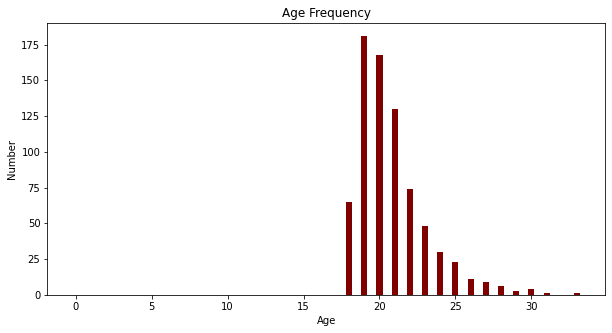

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(age_keys, age_frequencies, color ='maroon', width = 0.4)

plt.xlabel("Age")
plt.ylabel("Number")
plt.title("Age Frequency")
plt.show()

In [ ]:
education = df['edu']
list_of_bachelor, list_of_phd, list_of_master = [], [], []
for j in range(0,len(education)):
  if (pd.isnull(education[j])) == False and np.isnan(age_list[j]) == False:
    if education[j] == 'bachelor':
      list_of_bachelor.append(age_list[j])
    elif education[j] == 'master':
      list_of_master.append(age_list[j])
    else:
      list_of_phd.append(age_list[j])

print('BA  min age is: ',min(list_of_bachelor),'\tmax age is: ',max(list_of_bachelor),'\tavg age is: ',np.mean(list_of_bachelor) )
print('MA  min age is: ',min(list_of_master),'\tmax age is: ',max(list_of_master),'\tavg age is: ',np.mean(list_of_master) )
print('PHD min age is: ',min(list_of_phd),'\tmax age is: ',max(list_of_phd),'\tavg age is: ',np.mean(list_of_phd) )
print('number of BA students: ',len(list_of_bachelor))
print('number of MA students: ',len(list_of_master))
print('number of phd students: ',len(list_of_phd))

BA  min age is:  18.0 	max age is:  30.0 	avg age is:  20.22082018927445
MA  min age is:  22.0 	max age is:  33.0 	avg age is:  24.686746987951807
PHD min age is:  18.0 	max age is:  30.0 	avg age is:  22.72
number of BA students:  634
number of MA students:  83
number of phd students:  25


In [ ]:
count = 0
for j in range(0,len(education)):
  if (pd.isnull(education[j])) == False and np.isnan(age_list[j]) == True: #sen ro nadare, edu ro dare
    if education[j] == 'bachelor':
      age_list[j] = 20
    elif education[j] == 'master':
      age_list[j] = 25
    else:
      age_list[j] = 28

for j in range(0,len(education)):
  if (pd.isnull(education[j])) == True and np.isnan(age_list[j]) == False: #edu ro nadare, sen ro dare
    temp_list = [np.abs(age_list[j]-20), np.abs(age_list[j]-25), np.abs(age_list[j]-28)]
    minpos = temp_list.index(min(temp_list))
    count += 1
    if minpos == 0:
      education[j] = 'bachelor'
    elif minpos == 1:
      education[j] = 'master'
    else:
      education[j] = 'phd'

for j in range(0,len(education)):
  if (pd.isnull(education[j])) == True and np.isnan(age_list[j]) == True: #edu ro nadare, sen ro nadare
    education[j] = 'bachelor'
    count += 1
    age_list[j] = 20
print(count)
for j in range(0,len(education)):
  if (pd.isnull(education[j])) == True:
    print('l')

19


<ipython-input-55-aea5ecc8571c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_list[j] = 20
<ipython-input-55-aea5ecc8571c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_list[j] = 25
<ipython-input-55-aea5ecc8571c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education[j] = 'bachelor'
<ipython-input-55-aea5ecc8571c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [ ]:
for j in range(0,len(education)):
  if np.isnan(age_list[j]) or pd.isnull(education[j]) == True:
    print(education[j])

In [ ]:
df['edu'] = education
df['age'] = age_list
pd.isnull(df['edu'])
pd.isnull(df['age'])

0      False
1      False
2      False
3      False
4      False
       ...  
761    False
762    False
763    False
764    False
765    False
Name: age, Length: 766, dtype: bool

In [ ]:
marital_status = df['marital_parents']
counter = 0
for a in range(0,len(marital_status)):
  if pd.isnull(marital_status[a]) == True:
    counter += 1
print('number of null marital_parents: ',counter)

number of null marital_parents:  269


In [ ]:
df = df.drop("Fjob", axis='columns')
df = df.drop("Mjob", axis='columns')
df = df.drop("marital_parents", axis='columns')
df = df.drop("code", axis='columns')
df.head()

,Unnamed: 0,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,19.0,bachelor,NaN,small city,small city,NaN,MA,BA,medium,...,1.0,1.000000,2.800000,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,33.0,master,NaN,other,tehran,NaN,BA,bisavad,medium,...,2.0,2.000000,2.000000,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,21.0,bachelor,NaN,NaN,NaN,NaN,diplom,diplom,medium,...,2.0,1.666667,3.100000,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,20.0,bachelor,NaN,NaN,NaN,NaN,NaN,NaN,medium,...,1.0,1.333333,2.700000,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,4,24.0,master,science,big city,NaN,NaN,school,diplom,medium,...,NaN,NaN,2.555556,2.833333,2.818182,3.125000,2.625000,3.937500,NaN,NaN


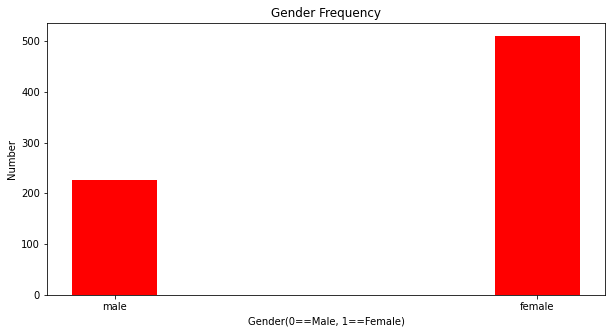

number of missed gender is: 30


In [ ]:
gender = df['gender']
gender_null = 0
list_genders = [0,0]
for i in range(0,len(gender)):
  if pd.isnull(gender[i]) == False:
    if gender[i] == 'female':
      list_genders[1] += 1
    else :
      list_genders[0] += 1
  elif pd.isnull(gender[i]) == True:
    gender_null += 1

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(['male','female'], list_genders, color ='red', width = 0.2)

plt.xlabel("Gender(0==Male, 1==Female)")
plt.ylabel("Number")
plt.title("Gender Frequency")
plt.show()
print('number of missed gender is:', gender_null)

In [ ]:
for i in range(0,len(gender)):
  if pd.isnull(gender[i]) == True:
    gender[i] = 'female'

pd.isnull(gender)

<ipython-input-61-1a1e2e9fa759>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[i] = 'female'


0      False
1      False
2      False
3      False
4      False
       ...  
761    False
762    False
763    False
764    False
765    False
Name: gender, Length: 766, dtype: bool

In [ ]:
df['gender'] = gender
df.head()

,Unnamed: 0,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,19.0,bachelor,NaN,small city,small city,female,MA,BA,medium,...,1.0,1.000000,2.800000,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,33.0,master,NaN,other,tehran,female,BA,bisavad,medium,...,2.0,2.000000,2.000000,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,21.0,bachelor,NaN,NaN,NaN,female,diplom,diplom,medium,...,2.0,1.666667,3.100000,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,20.0,bachelor,NaN,NaN,NaN,female,NaN,NaN,medium,...,1.0,1.333333,2.700000,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,4,24.0,master,science,big city,NaN,female,school,diplom,medium,...,NaN,NaN,2.555556,2.833333,2.818182,3.125000,2.625000,3.937500,NaN,NaN


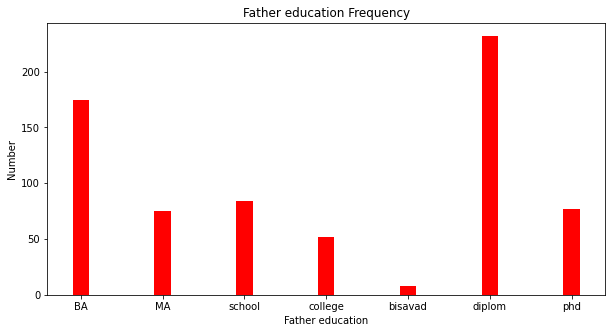

number of missed Fedu is: 63


In [ ]:
fedu = df['Fedu']
fedu_null = 0
list_fedu = [0 for i in range(7)] #0-BA 1-MA 2-school 3-college 4-bisavad 5-diplom 6- phd
for i in range(0,len(fedu)):
  if pd.isnull(fedu[i]) == False:
    if fedu[i] == 'BA':
      list_fedu[0] += 1
    if fedu[i] == 'MA':
      list_fedu[1] += 1
    if fedu[i] == 'school':
      list_fedu[2] += 1
    if fedu[i] == 'college':
      list_fedu[3] += 1
    if fedu[i] == 'bisavad':
      list_fedu[4] += 1
    if fedu[i] == 'diplom':
      list_fedu[5] += 1
    if fedu[i] == 'phd':
      list_fedu[6] += 1

  elif pd.isnull(fedu[i]) == True:
    fedu_null += 1

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(['BA','MA', 'school', 'college','bisavad','diplom','phd'], list_fedu, color ='red', width = 0.2)

plt.xlabel("Father education")
plt.ylabel("Number")
plt.title("Father education Frequency")
plt.show()
print('number of missed Fedu is:', fedu_null)

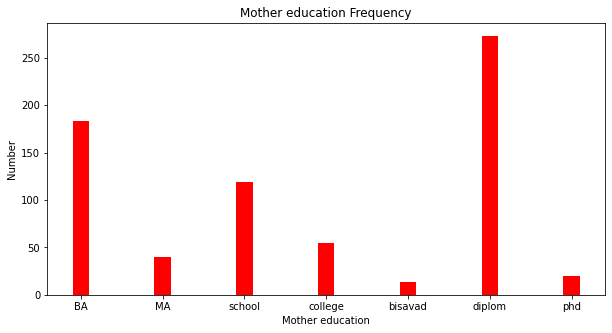

number of missed Medu is: 62


In [ ]:
medu = df['Medu']
medu_null = 0
list_medu = [0 for i in range(7)] #0-BA 1-MA 2-school 3-college 4-bisavad 5-diplom 6- phd
for i in range(0,len(medu)):
  if pd.isnull(medu[i]) == False:
    if medu[i] == 'BA':
      list_medu[0] += 1
    if medu[i] == 'MA':
      list_medu[1] += 1
    if medu[i] == 'school':
      list_medu[2] += 1
    if medu[i] == 'college':
      list_medu[3] += 1
    if medu[i] == 'bisavad':
      list_medu[4] += 1
    if medu[i] == 'diplom':
      list_medu[5] += 1
    if medu[i] == 'phd':
      list_medu[6] += 1

  elif pd.isnull(medu[i]) == True:
    medu_null += 1

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(['BA','MA', 'school', 'college','bisavad','diplom','phd'], list_medu, color ='red', width = 0.2)

plt.xlabel("Mother education")
plt.ylabel("Number")
plt.title("Mother education Frequency")
plt.show()
print('number of missed Medu is:', medu_null)

In [ ]:
for i in range(0,len(fedu)):
  if pd.isnull(fedu[i]) == True:
    fedu[i] = 'diplom'

for i in range(0,len(medu)):
  if pd.isnull(medu[i]) == True:
    medu[i] = 'diplom'

df['Fedu'] = fedu
df['Medu'] = medu
df.head()

<ipython-input-65-5075ca6de99a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fedu[i] = 'diplom'
<ipython-input-65-5075ca6de99a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medu[i] = 'diplom'


,Unnamed: 0,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,19.0,bachelor,NaN,small city,small city,female,MA,BA,medium,...,1.0,1.000000,2.800000,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,33.0,master,NaN,other,tehran,female,BA,bisavad,medium,...,2.0,2.000000,2.000000,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,21.0,bachelor,NaN,NaN,NaN,female,diplom,diplom,medium,...,2.0,1.666667,3.100000,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,20.0,bachelor,NaN,NaN,NaN,female,diplom,diplom,medium,...,1.0,1.333333,2.700000,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,4,24.0,master,science,big city,NaN,female,school,diplom,medium,...,NaN,NaN,2.555556,2.833333,2.818182,3.125000,2.625000,3.937500,NaN,NaN


In [ ]:
df[['q21','q22']] = df[['q21','q22']].fillna('no opinion')
print(df[['q21','q22']].loc[[8]])

          q21         q22
8  no opinion  no opinion


In [ ]:
list_questions = ['Q12','Q13','Q14','Q15','Q16','Q17','Q18',
        'Q19','Q110','Q111','Q112','Q113','Q114','Q115','Q116',
        'Q117','Q118','Q119','Q120','Q121','Q122','Q123','Q124',
        'Q125','Q126','Q127','Q128','Q129','Q130','Q131','Q132',
        'Q133','Q134','Q135','Q136','Q137','Q138','Q139','Q140',
        'Q141','Q142','Q143','Q144','Q145','Q146','Q147','Q148',
        'Q149','Q150','Q151','Q152','Q153','Q154','Q155','Q156']

df[list_questions] = df[list_questions].fillna(3)
print(df[list_questions].loc[[7]])

   Q12  Q13  Q14  Q15  Q16  Q17  Q18  Q19  Q110  Q111  ...  Q147  Q148  Q149  \
7  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0   3.0   1.0  ...   2.0   2.0   1.0   

   Q150  Q151  Q152  Q153  Q154  Q155  Q156  
7   5.0   5.0   2.0   4.0   3.0   2.0   3.0  

[1 rows x 55 columns]


In [ ]:
df['Q11'] = df['Q11'].fillna('no opinion')
print(df['Q11'].loc[[7]])

7    no opinion
Name: Q11, dtype: object


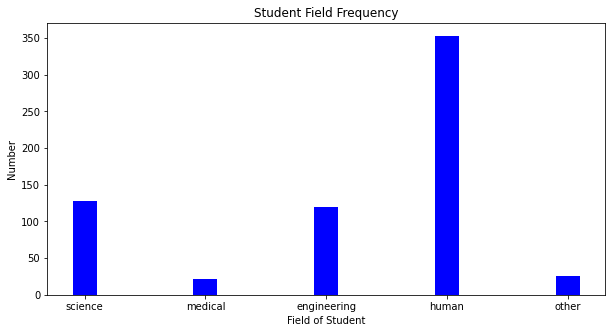

number of missed fields is: 118


In [ ]:
field = df['field']
field_null = 0
list_field = [0 for i in range(5)] #0-science 1-medical 2-engineering 3-human 4-other
for i in range(0,len(field)):
  if pd.isnull(field[i]) == False:
    if field[i] == 'science':
      list_field[0] += 1
    if field[i] == 'medical':
      list_field[1] += 1
    if field[i] == 'engi':
      list_field[2] += 1
    if field[i] == 'human':
      list_field[3] += 1
    if field[i] == 'other':
      list_field[4] += 1

  elif pd.isnull(field[i]) == True:
    field_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['science','medical', 'engineering', 'human','other'], list_field, color ='blue', width = 0.2)
plt.xlabel("Field of Student")
plt.ylabel("Number")
plt.title("Student Field Frequency")
plt.show()
print('number of missed fields is:', field_null)

In [ ]:
df['field'] = df['field'].fillna('human')
df.head()

,Unnamed: 0,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,...,1.0,1.000000,2.800000,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,33.0,master,human,other,tehran,female,BA,bisavad,medium,...,2.0,2.000000,2.000000,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,21.0,bachelor,human,NaN,NaN,female,diplom,diplom,medium,...,2.0,1.666667,3.100000,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,20.0,bachelor,human,NaN,NaN,female,diplom,diplom,medium,...,1.0,1.333333,2.700000,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,4,24.0,master,science,big city,NaN,female,school,diplom,medium,...,NaN,NaN,2.555556,2.833333,2.818182,3.125000,2.625000,3.937500,NaN,NaN


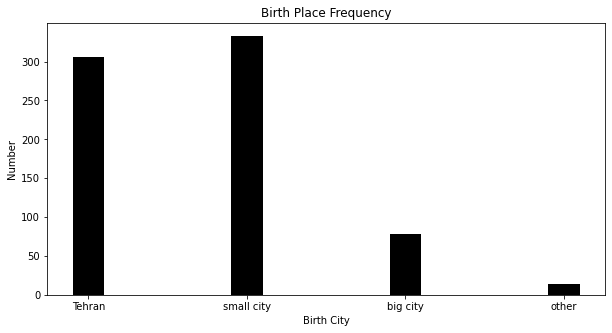

number of missed Bcities is: 35


In [ ]:
Bcity = df['Bcity']
Bcity_null = 0
list_Bcity = [0 for i in range(4)] #0-tehran 1-small city 2-big city 3-other
for i in range(0,len(Bcity)):
  if pd.isnull(Bcity[i]) == False:
    if Bcity[i] == 'Tehran' :
      list_Bcity[0] += 1
    if Bcity[i] == 'small city':
      list_Bcity[1] += 1
    if Bcity[i] == 'big city':
      list_Bcity[2] += 1
    if Bcity[i] == 'other':
      list_Bcity[3] += 1

  elif pd.isnull(Bcity[i]) == True:
    Bcity_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['Tehran','small city', 'big city', 'other'], list_Bcity, color ='black', width = 0.2)
plt.xlabel("Birth City")
plt.ylabel("Number")
plt.title("Birth Place Frequency")
plt.show()
print('number of missed Bcities is:', Bcity_null)

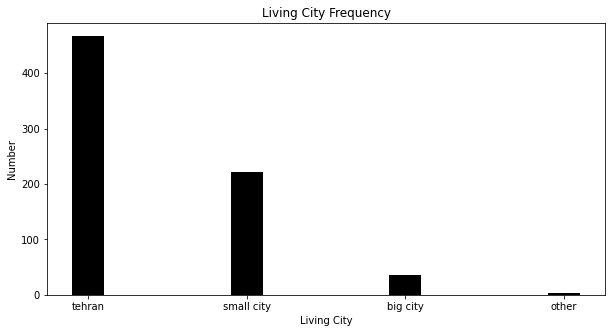

number of missed Bcities is: 38


In [ ]:
Lcity = df['Lcity']
Lcity_null = 0
list_Lcity = [0 for i in range(4)] #0-tehran 1-small city 2-big city 3-other
for i in range(0,len(Lcity)):
  if pd.isnull(Lcity[i]) == False:
    if Lcity[i] == 'tehran' :
      list_Lcity[0] += 1
    if Lcity[i] == 'small city':
      list_Lcity[1] += 1
    if Lcity[i] == 'big city':
      list_Lcity[2] += 1
    if Lcity[i] == 'other':
      list_Lcity[3] += 1

  elif pd.isnull(Lcity[i]) == True:
    Lcity_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['tehran','small city', 'big city', 'other'], list_Lcity, color ='black', width = 0.2)
plt.xlabel("Living City")
plt.ylabel("Number")
plt.title("Living City Frequency")
plt.show()
print('number of missed Bcities is:', Lcity_null)

In [ ]:
df['Bcity'] = df['Bcity'].fillna('Tehran')
df['Lcity'] = df['Lcity'].fillna('tehran')
df.head()

,Unnamed: 0,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,...,1.0,1.000000,2.800000,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,33.0,master,human,other,tehran,female,BA,bisavad,medium,...,2.0,2.000000,2.000000,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,2.0,1.666667,3.100000,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,1.0,1.333333,2.700000,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,4,24.0,master,science,big city,tehran,female,school,diplom,medium,...,NaN,NaN,2.555556,2.833333,2.818182,3.125000,2.625000,3.937500,NaN,NaN


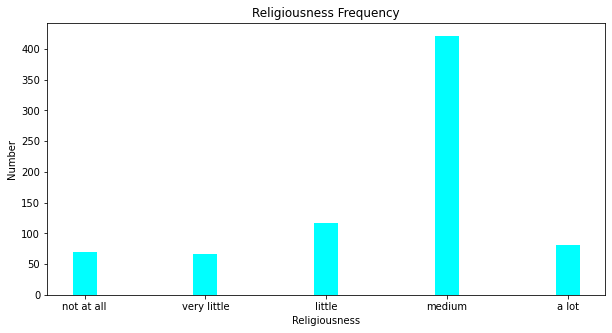

number of missed values is: 12


In [ ]:
religious = df['religious']
religious_null = 0
list_religious = [0 for i in range(5)] #0-not at all 1-very little 2-little 3-medium  4-a lot
for i in range(0,len(religious)):
  if pd.isnull(religious[i]) == False:
    if religious[i] == 'not at all' :
      list_religious[0] += 1
    if religious[i] == 'very little':
      list_religious[1] += 1
    if religious[i] == 'little':
      list_religious[2] += 1
    if religious[i] == 'medium':
      list_religious[3] += 1
    if religious[i] == 'a lot':
      list_religious[4] += 1

  elif pd.isnull(religious[i]) == True:
    religious_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['not at all','very little', 'little', 'medium', 'a lot'], list_religious, color ='cyan', width = 0.2)
plt.xlabel("Religiousness")
plt.ylabel("Number")
plt.title("Religiousness Frequency")
plt.show()
print('number of missed values is:', religious_null)

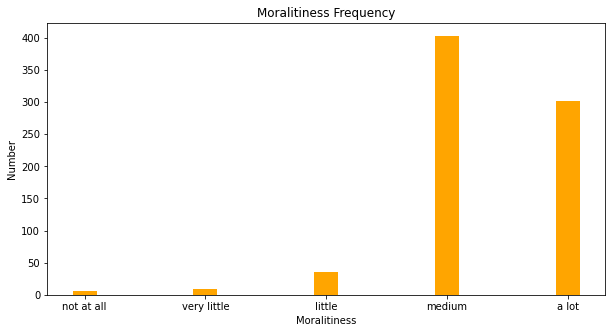

number of missed values is: 12


In [ ]:
morality = df['morality']
morality_null = 0
list_morality = [0 for i in range(5)] #0-not at all 1-very little 2-little 3-medium  4-a lot
for i in range(0,len(morality)):
  if pd.isnull(morality[i]) == False:
    if morality[i] == 'not at all' :
      list_morality[0] += 1
    if morality[i] == 'very little':
      list_morality[1] += 1
    if morality[i] == 'little':
      list_morality[2] += 1
    if morality[i] == 'medium':
      list_morality[3] += 1
    if morality[i] == 'a lot':
      list_morality[4] += 1

  elif pd.isnull(morality[i]) == True:
    morality_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['not at all','very little', 'little', 'medium', 'a lot'], list_morality, color ='orange', width = 0.2)
plt.xlabel("Moralitiness")
plt.ylabel("Number")
plt.title("Moralitiness Frequency")
plt.show()
print('number of missed values is:', morality_null)

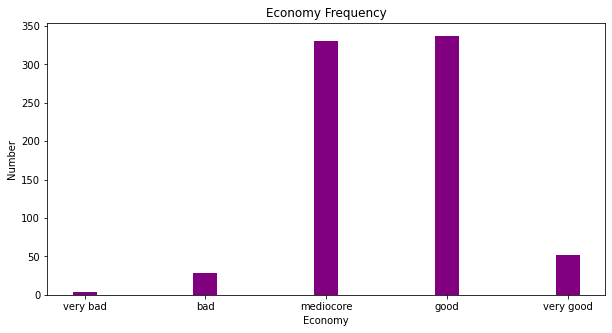

number of missed values is: 14


In [ ]:
economy = df['economy']
economy_null = 0
list_economy= [0 for i in range(5)] #0-very bad 1-bad 2-medicore 3-good  4-very good
for i in range(0,len(economy)):
  if pd.isnull(economy[i]) == False:
    if economy[i] == 'very bad' :
      list_economy[0] += 1
    if economy[i] == 'bad':
      list_economy[1] += 1
    if economy[i] == 'medicore':
      list_economy[2] += 1
    if economy[i] == 'good':
      list_economy[3] += 1
    if economy[i] == 'very good':
      list_economy[4] += 1

  elif pd.isnull(economy[i]) == True:
    economy_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['very bad','bad', 'mediocore', 'good', 'very good'], list_economy, color ='purple', width = 0.2)
plt.xlabel("Economy")
plt.ylabel("Number")
plt.title("Economy Frequency")
plt.show()
print('number of missed values is:', economy_null)

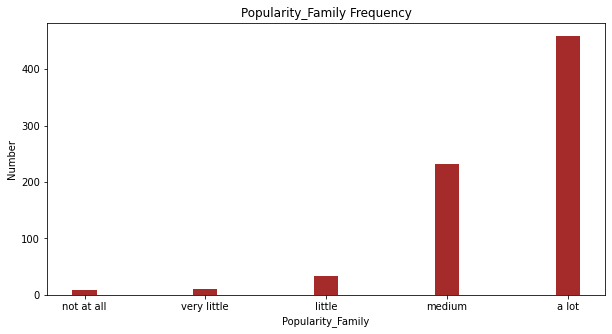

number of missed values is: 24


In [ ]:
Popularity_Family = df['Popularity_Family']
Popularity_Family_null = 0
list_Popularity_Family = [0 for i in range(5)] #0-not at all 1-very little 2-little 3-medium  4-a lot
for i in range(0,len(Popularity_Family)):
  if pd.isnull(Popularity_Family[i]) == False:
    if Popularity_Family[i] == 'not at all' :
      list_Popularity_Family[0] += 1
    if Popularity_Family[i] == 'very little':
      list_Popularity_Family[1] += 1
    if Popularity_Family[i] == 'little':
      list_Popularity_Family[2] += 1
    if Popularity_Family[i] == 'medium':
      list_Popularity_Family[3] += 1
    if Popularity_Family[i] == 'a lot':
      list_Popularity_Family[4] += 1

  elif pd.isnull(Popularity_Family[i]) == True:
    Popularity_Family_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['not at all','very little', 'little', 'medium', 'a lot'], list_Popularity_Family, color ='brown', width = 0.2)
plt.xlabel("Popularity_Family")
plt.ylabel("Number")
plt.title("Popularity_Family Frequency")
plt.show()
print('number of missed values is:', Popularity_Family_null)

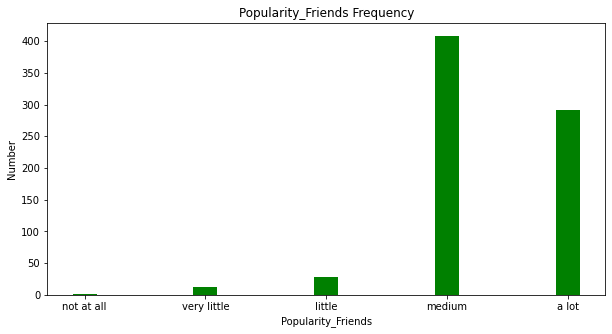

number of missed values is: 24


In [ ]:
Popularity_Friends = df['Popularity_Friends']
Popularity_Friends_null = 0
list_Popularity_Friends = [0 for i in range(5)] #0-not at all 1-very little 2-little 3-medium  4-a lot
for i in range(0,len(Popularity_Friends)):
  if pd.isnull(Popularity_Friends[i]) == False:
    if Popularity_Friends[i] == 'not at all' :
      list_Popularity_Friends[0] += 1
    if Popularity_Friends[i] == 'very little':
      list_Popularity_Friends[1] += 1
    if Popularity_Friends[i] == 'little':
      list_Popularity_Friends[2] += 1
    if Popularity_Friends[i] == 'medium':
      list_Popularity_Friends[3] += 1
    if Popularity_Friends[i] == 'a lot':
      list_Popularity_Friends[4] += 1

  elif pd.isnull(Popularity_Friends[i]) == True:
    Popularity_Friends_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['not at all','very little', 'little', 'medium', 'a lot'], list_Popularity_Friends, color ='green', width = 0.2)
plt.xlabel("Popularity_Friends")
plt.ylabel("Number")
plt.title("Popularity_Friends Frequency")
plt.show()
print('number of missed values is:', Popularity_Friends_null)

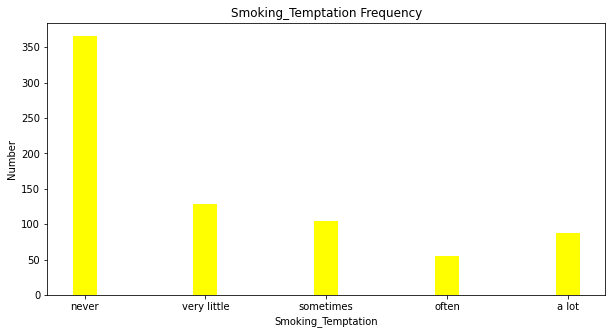

number of missed values is: 25


In [ ]:
Smoking_Temptation = df['Smoking_Temptation']
Smoking_Temptation_null = 0
list_Smoking_Temptation = [0 for i in range(5)] #0-never 1-very little 2-sometimes 3-often  4-a lot
for i in range(0,len(Smoking_Temptation)):
  if pd.isnull(Smoking_Temptation[i]) == False:
    if Smoking_Temptation[i] == 'never' :
      list_Smoking_Temptation[0] += 1
    if Smoking_Temptation[i] == 'very little':
      list_Smoking_Temptation[1] += 1
    if Smoking_Temptation[i] == 'sometimes':
      list_Smoking_Temptation[2] += 1
    if Smoking_Temptation[i] == 'often':
      list_Smoking_Temptation[3] += 1
    if Smoking_Temptation[i] == 'a lot':
      list_Smoking_Temptation[4] += 1

  elif pd.isnull(Smoking_Temptation[i]) == True:
    Smoking_Temptation_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['never','very little', 'sometimes', 'often', 'a lot'], list_Smoking_Temptation, color ='yellow', width = 0.2)
plt.xlabel("Smoking_Temptation")
plt.ylabel("Number")
plt.title("Smoking_Temptation Frequency")
plt.show()
print('number of missed values is:', Smoking_Temptation_null)

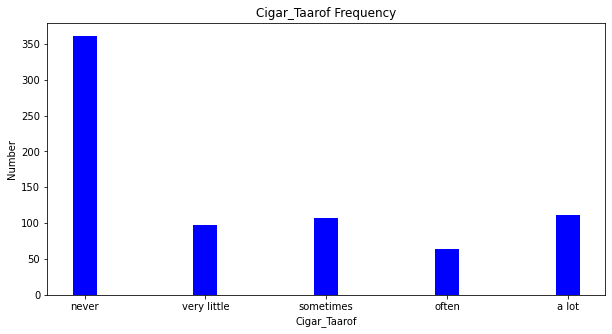

number of missed values is: 25


In [ ]:
Cigar_Taarof = df['Cigar_Taarof']
Cigar_Taarof_null = 0
list_Cigar_Taarof = [0 for i in range(5)] #0-never 1-very little 2-sometimes 3-often  4-a lot
for i in range(0,len(Cigar_Taarof)):
  if pd.isnull(Cigar_Taarof[i]) == False:
    if Cigar_Taarof[i] == 'never' :
      list_Cigar_Taarof[0] += 1
    if Cigar_Taarof[i] == 'very little':
      list_Cigar_Taarof[1] += 1
    if Cigar_Taarof[i] == 'sometimes':
      list_Cigar_Taarof[2] += 1
    if Cigar_Taarof[i] == 'often':
      list_Cigar_Taarof[3] += 1
    if Cigar_Taarof[i] == 'a lot':
      list_Cigar_Taarof[4] += 1

  elif pd.isnull(Cigar_Taarof[i]) == True:
    Cigar_Taarof_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['never','very little', 'sometimes', 'often', 'a lot'], list_Cigar_Taarof, color ='blue', width = 0.2)
plt.xlabel("Cigar_Taarof")
plt.ylabel("Number")
plt.title("Cigar_Taarof Frequency")
plt.show()
print('number of missed values is:', Cigar_Taarof_null)

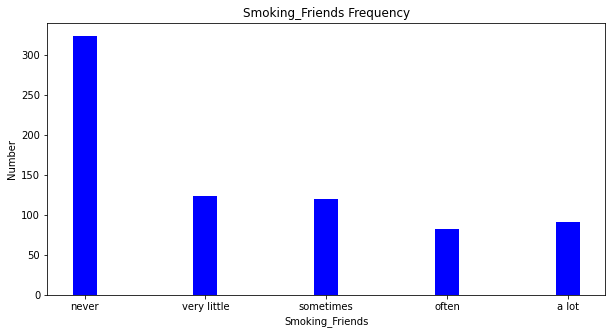

number of missed values is: 25


In [ ]:
Smoking_Friends = df['Smoking_Friends']
Smoking_Friends_null = 0
list_Smoking_Friends = [0 for i in range(5)] #0-never 1-very little 2-sometimes 3-often  4-a lot
for i in range(0,len(Smoking_Friends)):
  if pd.isnull(Smoking_Friends[i]) == False:
    if Smoking_Friends[i] == 'never' :
      list_Smoking_Friends[0] += 1
    if Smoking_Friends[i] == 'very little':
      list_Smoking_Friends[1] += 1
    if Smoking_Friends[i] == 'sometimes':
      list_Smoking_Friends[2] += 1
    if Smoking_Friends[i] == 'often':
      list_Smoking_Friends[3] += 1
    if Smoking_Friends[i] == 'a lot':
      list_Smoking_Friends[4] += 1

  elif pd.isnull(Smoking_Friends[i]) == True:
    Smoking_Friends_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['never','very little', 'sometimes', 'often', 'a lot'], list_Smoking_Friends, color ='blue', width = 0.2)
plt.xlabel("Smoking_Friends")
plt.ylabel("Number")
plt.title("Smoking_Friends Frequency")
plt.show()
print('number of missed values is:', Smoking_Friends_null)

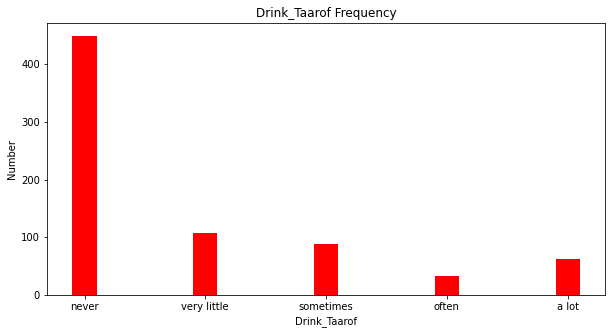

number of missed values is: 27


In [ ]:
Drink_Taarof = df['Drink_Taarof']
Drink_Taarof_null = 0
list_Drink_Taarof = [0 for i in range(5)] #0-never 1-very little 2-sometimes 3-often  4-a lot
for i in range(0,len(Drink_Taarof)):
  if pd.isnull(Drink_Taarof[i]) == False:
    if Drink_Taarof[i] == 'never' :
      list_Drink_Taarof[0] += 1
    if Drink_Taarof[i] == 'very little':
      list_Drink_Taarof[1] += 1
    if Drink_Taarof[i] == 'sometimes':
      list_Drink_Taarof[2] += 1
    if Drink_Taarof[i] == 'often':
      list_Drink_Taarof[3] += 1
    if Drink_Taarof[i] == 'a lot':
      list_Drink_Taarof[4] += 1

  elif pd.isnull(Drink_Taarof[i]) == True:
    Drink_Taarof_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['never','very little', 'sometimes', 'often', 'a lot'], list_Drink_Taarof, color ='red', width = 0.2)
plt.xlabel("Drink_Taarof")
plt.ylabel("Number")
plt.title("Drink_Taarof Frequency")
plt.show()
print('number of missed values is:', Drink_Taarof_null)

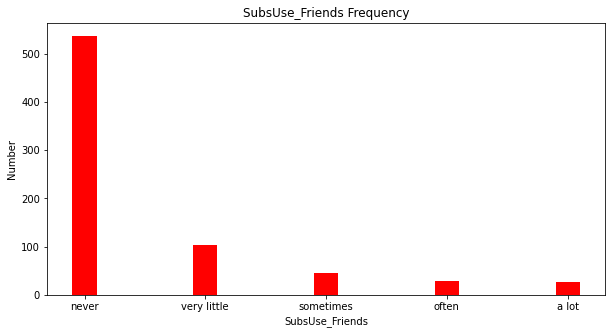

number of missed values is: 26


In [ ]:
SubsUse_Friends = df['SubsUse_Friends']
SubsUse_Friends_null = 0
list_SubsUse_Friends = [0 for i in range(5)] #0-never 1-very little 2-sometimes 3-often  4-a lot
for i in range(0,len(SubsUse_Friends)):
  if pd.isnull(SubsUse_Friends[i]) == False:
    if SubsUse_Friends[i] == 'never' :
      list_SubsUse_Friends[0] += 1
    if SubsUse_Friends[i] == 'very little':
      list_SubsUse_Friends[1] += 1
    if SubsUse_Friends[i] == 'sometimes':
      list_SubsUse_Friends[2] += 1
    if SubsUse_Friends[i] == 'often':
      list_SubsUse_Friends[3] += 1
    if SubsUse_Friends[i] == 'a lot':
      list_SubsUse_Friends[4] += 1

  elif pd.isnull(SubsUse_Friends[i]) == True:
    SubsUse_Friends_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['never','very little', 'sometimes', 'often', 'a lot'], list_SubsUse_Friends, color ='red', width = 0.2)
plt.xlabel("SubsUse_Friends")
plt.ylabel("Number")
plt.title("SubsUse_Friends Frequency")
plt.show()
print('number of missed values is:', SubsUse_Friends_null)

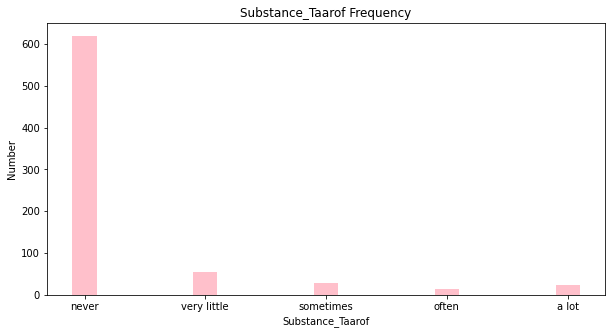

number of missed values is: 25


In [ ]:
Substance_Taarof = df['Substance_Taarof']
Substance_Taarof_null = 0
list_Substance_Taarof = [0 for i in range(5)] #0-never 1-very little 2-sometimes 3-often  4-a lot
for i in range(0,len(Substance_Taarof)):
  if pd.isnull(Substance_Taarof[i]) == False:
    if Substance_Taarof[i] == 'never' :
      list_Substance_Taarof[0] += 1
    if Substance_Taarof[i] == 'very little':
      list_Substance_Taarof[1] += 1
    if Substance_Taarof[i] == 'sometimes':
      list_Substance_Taarof[2] += 1
    if Substance_Taarof[i] == 'often':
      list_Substance_Taarof[3] += 1
    if Substance_Taarof[i] == 'a lot':
      list_Substance_Taarof[4] += 1

  elif pd.isnull(Substance_Taarof[i]) == True:
    Substance_Taarof_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['never','very little', 'sometimes', 'often', 'a lot'], list_Substance_Taarof, color ='pink', width = 0.2)
plt.xlabel("Substance_Taarof")
plt.ylabel("Number")
plt.title("Substance_Taarof Frequency")
plt.show()
print('number of missed values is:', Substance_Taarof_null)

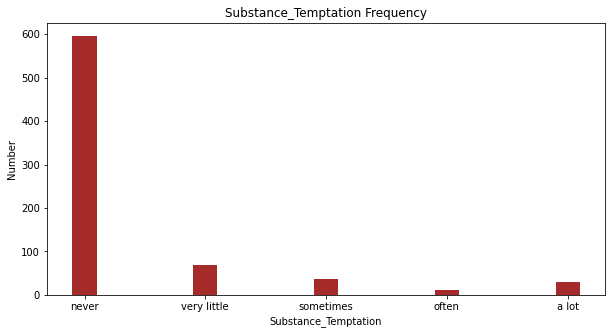

number of missed values is: 25


In [ ]:
Substance_Temptation = df['Substance_Temptation']
Substance_Temptation_null = 0
list_Substance_Temptation = [0 for i in range(5)] #0-never 1-very little 2-sometimes 3-often  4-a lot
for i in range(0,len(Substance_Temptation)):
  if pd.isnull(Substance_Temptation[i]) == False:
    if Substance_Temptation[i] == 'never' :
      list_Substance_Temptation[0] += 1
    if Substance_Temptation[i] == 'very little':
      list_Substance_Temptation[1] += 1
    if Substance_Temptation[i] == 'sometimes':
      list_Substance_Temptation[2] += 1
    if Substance_Temptation[i] == 'often':
      list_Substance_Temptation[3] += 1
    if Substance_Temptation[i] == 'a lot':
      list_Substance_Temptation[4] += 1

  elif pd.isnull(Substance_Temptation[i]) == True:
    Substance_Temptation_null += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(['never','very little', 'sometimes', 'often', 'a lot'], list_Substance_Temptation, color ='brown', width = 0.2)
plt.xlabel("Substance_Temptation")
plt.ylabel("Number")
plt.title("Substance_Temptation Frequency")
plt.show()
print('number of missed values is:', Substance_Temptation_null)

In [ ]:
df['Substance_Temptation'] = df['Substance_Temptation'].fillna('never')
df['Substance_Taarof'] = df['Substance_Taarof'].fillna('never')
df['SubsUse_Friends'] = df['SubsUse_Friends'].fillna('never')
df['Drink_Taarof'] = df['Drink_Taarof'].fillna('never')
df['Smoking_Friends'] = df['Smoking_Friends'].fillna('never')
df['Cigar_Taarof'] = df['Cigar_Taarof'].fillna('never')
df['Smoking_Temptation'] = df['Smoking_Temptation'].fillna('never')
df['Popularity_Friends'] = df['Popularity_Friends'].fillna('medium')
df['Popularity_Family'] = df['Popularity_Family'].fillna('a lot')
df['economy'] = df['economy'].fillna('medicore')
df['religious'] = df['religious'].fillna('medium')
df['morality'] = df['morality'].fillna('medium')
df.head()

,Unnamed: 0,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,...,1.0,1.000000,2.800000,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,33.0,master,human,other,tehran,female,BA,bisavad,medium,...,2.0,2.000000,2.000000,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,2.0,1.666667,3.100000,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,1.0,1.333333,2.700000,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,4,24.0,master,science,big city,tehran,female,school,diplom,medium,...,NaN,NaN,2.555556,2.833333,2.818182,3.125000,2.625000,3.937500,NaN,NaN


In [ ]:
Mean_Popularity = df['Mean_Popularity']
Mean_Popularity_null = 0
for i in range(0,len(Mean_Popularity)):
  if pd.isnull(Mean_Popularity[i]) == True:
    Mean_Popularity_null += 1
print('number of missed values is:',Mean_Popularity_null)

number of missed values is: 24


In [ ]:
df = df.drop(index=[4,8,10,21,24,55,64,139,161,162,240,241,267,493,579,586,590,595,644,655,660,662,671,690])
df.head()

,Unnamed: 0,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,33.0,master,human,other,tehran,female,BA,bisavad,medium,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
5,5,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,NaN,1.5,1.0


In [ ]:
#df.to_csv('addiction_full2.csv')
#Self_efficacy
df = pd.read_csv('addiction_full2.csv')
df

,Unnamed: 0,Unnamed: 0.1,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,0,19.0,bachelor,human,small city,small city,female,MA,BA,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,1,33.0,master,human,other,tehran,female,BA,bisavad,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,5,5,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,NaN,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,761,761,20.0,bachelor,engi,big city,big city,male,school,school,...,1.0,1.000000,2.2,2.533333,3.769231,2.111111,2.000000,3.470588,1.0,1.0
738,762,762,20.0,bachelor,engi,Tehran,tehran,male,diplom,diplom,...,1.5,1.666667,2.9,2.800000,2.615385,2.888889,3.333333,3.176471,2.5,1.0
739,763,763,21.0,bachelor,engi,small city,small city,male,BA,BA,...,3.0,3.333333,2.9,2.666667,2.769231,2.222222,2.444444,3.090909,4.0,1.5
740,764,764,21.0,bachelor,engi,small city,small city,male,school,school,...,2.0,2.000000,3.3,3.066667,3.923077,3.222222,2.111111,4.000000,3.0,1.0


In [ ]:
df = df.drop('Unnamed: 0',axis=1)
df

,Unnamed: 0.1,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,33.0,master,human,other,tehran,female,BA,bisavad,medium,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,5,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,NaN,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,761,20.0,bachelor,engi,big city,big city,male,school,school,medium,...,1.0,1.000000,2.2,2.533333,3.769231,2.111111,2.000000,3.470588,1.0,1.0
738,762,20.0,bachelor,engi,Tehran,tehran,male,diplom,diplom,little,...,1.5,1.666667,2.9,2.800000,2.615385,2.888889,3.333333,3.176471,2.5,1.0
739,763,21.0,bachelor,engi,small city,small city,male,BA,BA,little,...,3.0,3.333333,2.9,2.666667,2.769231,2.222222,2.444444,3.090909,4.0,1.5
740,764,21.0,bachelor,engi,small city,small city,male,school,school,medium,...,2.0,2.000000,3.3,3.066667,3.923077,3.222222,2.111111,4.000000,3.0,1.0


In [ ]:
df = df.drop('Unnamed: 0.1',axis=1)
df

,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,a lot,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,33.0,master,human,other,tehran,female,BA,bisavad,medium,little,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,NaN,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,20.0,bachelor,engi,big city,big city,male,school,school,medium,medium,...,1.0,1.000000,2.2,2.533333,3.769231,2.111111,2.000000,3.470588,1.0,1.0
738,20.0,bachelor,engi,Tehran,tehran,male,diplom,diplom,little,a lot,...,1.5,1.666667,2.9,2.800000,2.615385,2.888889,3.333333,3.176471,2.5,1.0
739,21.0,bachelor,engi,small city,small city,male,BA,BA,little,not at all,...,3.0,3.333333,2.9,2.666667,2.769231,2.222222,2.444444,3.090909,4.0,1.5
740,21.0,bachelor,engi,small city,small city,male,school,school,medium,a lot,...,2.0,2.000000,3.3,3.066667,3.923077,3.222222,2.111111,4.000000,3.0,1.0


In [ ]:
Self_efficacy = df['Self_efficacy']
Self_efficacy_null = 0
for i in range(0,len(Self_efficacy)):
  if np.isnan(Self_efficacy[i]) == True:
    Self_efficacy_null += 1

print('missed values are: ',Self_efficacy_null)
print('avg of Self_efficacy is: ',np.mean(Self_efficacy))
df['Self_efficacy'] = df['Self_efficacy'].fillna(np.mean(Self_efficacy))
df

missed values are:  2
avg of Self_efficacy is:  3.6331001761837833


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,a lot,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,33.0,master,human,other,tehran,female,BA,bisavad,medium,little,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,20.0,bachelor,engi,big city,big city,male,school,school,medium,medium,...,1.0,1.000000,2.2,2.533333,3.769231,2.111111,2.000000,3.470588,1.0,1.0
738,20.0,bachelor,engi,Tehran,tehran,male,diplom,diplom,little,a lot,...,1.5,1.666667,2.9,2.800000,2.615385,2.888889,3.333333,3.176471,2.5,1.0
739,21.0,bachelor,engi,small city,small city,male,BA,BA,little,not at all,...,3.0,3.333333,2.9,2.666667,2.769231,2.222222,2.444444,3.090909,4.0,1.5
740,21.0,bachelor,engi,small city,small city,male,school,school,medium,a lot,...,2.0,2.000000,3.3,3.066667,3.923077,3.222222,2.111111,4.000000,3.0,1.0


In [ ]:
Self_efficacy = df['Self_efficacy']
Self_efficacy_null = 0
for i in range(0,len(Self_efficacy)):
  if np.isnan(Self_efficacy[i]) == True:
    Self_efficacy_null += 1
print('missed values are: ',Self_efficacy_null)

missed values are:  0


In [ ]:
Mean_Popularity = df['Mean_Popularity']
Mean_Popularity_null = 0
for i in range(0,len(Mean_Popularity)):
  if np.isnan(Mean_Popularity[i]) == True:
    Mean_Popularity_null += 1
print('missed values are: ',Mean_Popularity_null)

missed values are:  0


In [ ]:
Mean_Temptation = df['Mean_Temptation']
Mean_Temptation_null = 0
for i in range(0,len(Mean_Temptation)):
  if np.isnan(Mean_Temptation[i]) == True:
    Mean_Temptation_null += 1
print('missed values are: ',Mean_Temptation_null)

missed values are:  0


In [ ]:
Mean_Friends_SmokeSubs = df['Mean_Friends_SmokeSubs']
Mean_Friends_SmokeSubs_null = 0
for i in range(0,len(Mean_Friends_SmokeSubs)):
  if np.isnan(Mean_Friends_SmokeSubs[i]) == True:
    Mean_Friends_SmokeSubs_null += 1
print('missed values are: ',Mean_Friends_SmokeSubs_null)

print('missed values are: ',Mean_Friends_SmokeSubs_null)
print('avg of Mean_Friends_SmokeSubs is: ',np.mean(Mean_Friends_SmokeSubs))
df['Mean_Friends_SmokeSubs'] = df['Mean_Friends_SmokeSubs'].fillna(np.mean(Mean_Friends_SmokeSubs))
df

missed values are:  1
missed values are:  1
avg of Mean_Friends_SmokeSubs is:  1.9156545209176787


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,a lot,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,33.0,master,human,other,tehran,female,BA,bisavad,medium,little,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,20.0,bachelor,engi,big city,big city,male,school,school,medium,medium,...,1.0,1.000000,2.2,2.533333,3.769231,2.111111,2.000000,3.470588,1.0,1.0
738,20.0,bachelor,engi,Tehran,tehran,male,diplom,diplom,little,a lot,...,1.5,1.666667,2.9,2.800000,2.615385,2.888889,3.333333,3.176471,2.5,1.0
739,21.0,bachelor,engi,small city,small city,male,BA,BA,little,not at all,...,3.0,3.333333,2.9,2.666667,2.769231,2.222222,2.444444,3.090909,4.0,1.5
740,21.0,bachelor,engi,small city,small city,male,school,school,medium,a lot,...,2.0,2.000000,3.3,3.066667,3.923077,3.222222,2.111111,4.000000,3.0,1.0


In [ ]:
Mean_Friends_SmokeSubs = df['Mean_Friends_SmokeSubs']
Mean_Friends_SmokeSubs_null = 0
for i in range(0,len(Mean_Friends_SmokeSubs)):
  if np.isnan(Mean_Friends_SmokeSubs[i]) == True:
    Mean_Friends_SmokeSubs_null += 1
print('missed values are: ',Mean_Friends_SmokeSubs_null)

missed values are:  0


In [ ]:
Mean_Taarof = df['Mean_Taarof']
Mean_Taarof_null = 0
for i in range(0,len(Mean_Taarof)):
  if np.isnan(Mean_Taarof[i]) == True:
    Mean_Taarof_null += 1
print('missed values are: ',Mean_Taarof_null)

missed values are:  1


In [ ]:
print('avg of Mean_Taarof is: ',np.mean(Mean_Taarof))
df['Mean_Taarof'] = df['Mean_Taarof'].fillna(np.mean(Mean_Taarof))
df

avg of Mean_Taarof is:  1.823436797110661


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,a lot,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,33.0,master,human,other,tehran,female,BA,bisavad,medium,little,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,20.0,bachelor,engi,big city,big city,male,school,school,medium,medium,...,1.0,1.000000,2.2,2.533333,3.769231,2.111111,2.000000,3.470588,1.0,1.0
738,20.0,bachelor,engi,Tehran,tehran,male,diplom,diplom,little,a lot,...,1.5,1.666667,2.9,2.800000,2.615385,2.888889,3.333333,3.176471,2.5,1.0
739,21.0,bachelor,engi,small city,small city,male,BA,BA,little,not at all,...,3.0,3.333333,2.9,2.666667,2.769231,2.222222,2.444444,3.090909,4.0,1.5
740,21.0,bachelor,engi,small city,small city,male,school,school,medium,a lot,...,2.0,2.000000,3.3,3.066667,3.923077,3.222222,2.111111,4.000000,3.0,1.0


In [ ]:
Mean_Taarof = df['Mean_Taarof']
Mean_Taarof_null = 0
for i in range(0,len(Mean_Taarof)):
  if np.isnan(Mean_Taarof[i]) == True:
    Mean_Taarof_null += 1
print('missed values are: ',Mean_Taarof_null)

missed values are:  0


In [ ]:
PastNegative = df['PastNegative']
PastNegative_null = 0
for i in range(0,len(PastNegative)):
  if np.isnan(PastNegative[i]) == True:
    PastNegative_null += 1
print('missed values are: ',PastNegative_null)

missed values are:  0


In [ ]:
PresentHedonistic = df['PresentHedonistic']
PresentHedonistic_null = 0
for i in range(0,len(PresentHedonistic)):
  if np.isnan(PresentHedonistic[i]) == True:
    PresentHedonistic_null += 1
print('missed values are: ',PresentHedonistic_null)

missed values are:  0


In [ ]:
PastPositive = df['PastPositive']
PastPositive_null = 0
for i in range(0,len(PastPositive)):
  if np.isnan(PastPositive[i]) == True:
    PastPositive_null += 1
print('missed values are: ',PastPositive_null)

missed values are:  0


In [ ]:
PresentFatalistic = df['PresentFatalistic']
PresentFatalistic_null = 0
for i in range(0,len(PresentFatalistic)):
  if np.isnan(PresentFatalistic[i]) == True:
    PresentFatalistic_null += 1
print('missed values are: ',PresentFatalistic_null)

missed values are:  0


In [ ]:
Social_Pressure_Cigarette = df['Social_Pressure_Cigarette']
Social_Pressure_Cigarette_null = 0
for i in range(0,len(Social_Pressure_Cigarette)):
  if np.isnan(Social_Pressure_Cigarette[i]) == True:
    Social_Pressure_Cigarette_null += 1
print('missed values are: ',Social_Pressure_Cigarette_null)

missed values are:  1


In [ ]:
print('avg of Social_Pressure_Cigarette is: ',np.mean(Social_Pressure_Cigarette))
df['Social_Pressure_Cigarette'] = df['Social_Pressure_Cigarette'].fillna(np.mean(Social_Pressure_Cigarette))
df

avg of Social_Pressure_Cigarette is:  2.2968960863697707


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,a lot,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,33.0,master,human,other,tehran,female,BA,bisavad,medium,little,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,20.0,bachelor,engi,big city,big city,male,school,school,medium,medium,...,1.0,1.000000,2.2,2.533333,3.769231,2.111111,2.000000,3.470588,1.0,1.0
738,20.0,bachelor,engi,Tehran,tehran,male,diplom,diplom,little,a lot,...,1.5,1.666667,2.9,2.800000,2.615385,2.888889,3.333333,3.176471,2.5,1.0
739,21.0,bachelor,engi,small city,small city,male,BA,BA,little,not at all,...,3.0,3.333333,2.9,2.666667,2.769231,2.222222,2.444444,3.090909,4.0,1.5
740,21.0,bachelor,engi,small city,small city,male,school,school,medium,a lot,...,2.0,2.000000,3.3,3.066667,3.923077,3.222222,2.111111,4.000000,3.0,1.0


In [ ]:
Social_Pressure_Cigarette = df['Social_Pressure_Cigarette']
Social_Pressure_Cigarette_null = 0
for i in range(0,len(Social_Pressure_Cigarette)):
  if np.isnan(Social_Pressure_Cigarette[i]) == True:
    Social_Pressure_Cigarette_null += 1
print('missed values are: ',Social_Pressure_Cigarette_null)

missed values are:  0


In [ ]:
Social_Pressure_Substance = df['Social_Pressure_Substance']
Social_Pressure_Substance_null = 0
for i in range(0,len(Social_Pressure_Substance)):
  if np.isnan(Social_Pressure_Substance[i]) == True:
    Social_Pressure_Substance_null += 1
print('missed values are: ',Social_Pressure_Substance_null)

missed values are:  1


In [ ]:
print('avg of Social_Pressure_Substance is: ',np.mean(Social_Pressure_Substance))
df['Social_Pressure_Substance'] = df['Social_Pressure_Substance'].fillna(np.mean(Social_Pressure_Substance))
df

avg of Social_Pressure_Substance is:  1.4284750337381917


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,‎Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,19.0,bachelor,human,small city,small city,female,MA,BA,medium,a lot,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,33.0,master,human,other,tehran,female,BA,bisavad,medium,little,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,21.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,20.0,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,20.0,bachelor,engi,big city,big city,male,school,school,medium,medium,...,1.0,1.000000,2.2,2.533333,3.769231,2.111111,2.000000,3.470588,1.0,1.0
738,20.0,bachelor,engi,Tehran,tehran,male,diplom,diplom,little,a lot,...,1.5,1.666667,2.9,2.800000,2.615385,2.888889,3.333333,3.176471,2.5,1.0
739,21.0,bachelor,engi,small city,small city,male,BA,BA,little,not at all,...,3.0,3.333333,2.9,2.666667,2.769231,2.222222,2.444444,3.090909,4.0,1.5
740,21.0,bachelor,engi,small city,small city,male,school,school,medium,a lot,...,2.0,2.000000,3.3,3.066667,3.923077,3.222222,2.111111,4.000000,3.0,1.0


In [ ]:
Social_Pressure_Substance = df['Social_Pressure_Substance']
Social_Pressure_Substance_null = 0
for i in range(0,len(Social_Pressure_Substance)):
  if np.isnan(Social_Pressure_Substance[i]) == True:
    Social_Pressure_Substance_null += 1
print('missed values are: ',Social_Pressure_Substance_null)

missed values are:  0


In [ ]:
df.to_csv('addiction_full3.csv')

In [ ]:
df = pd.read_csv('addiction_full3.csv')
df.head()

,Unnamed: 0,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,...,Mean_Friends_SmokeSubs,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance
0,0,19,bachelor,human,small city,small city,female,MA,BA,medium,...,1.0,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0
1,1,33,master,human,other,tehran,female,BA,bisavad,medium,...,2.0,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0
2,2,21,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,2.0,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0
3,3,20,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,1.0,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0
4,4,20,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,...,1.5,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0


In [ ]:
Future = df['Future']
Future_null = 0
for i in range(0,len(Future)):
  if np.isnan(Future[i]) == True:
    Future_null += 1
print('missed values are: ',Future_null)

missed values are:  0


In [ ]:
list_features = []
for col in df.columns:
    list_features.append(col)
print(list_features)

['Unnamed: 0', 'age', 'edu', 'field', 'Bcity', 'Lcity', 'gender', 'Fedu', 'Medu', 'religious', 'morality', 'economy', 'Popularity_Family', 'Popularity_Friends', 'Smoking_Temptation', 'Cigar_Taarof', 'Smoking_Friends', 'Drink_Taarof', 'Substance_Temptation', 'SubsUse_Friends', 'Substance_Taarof', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q110', 'Q111', 'Q112', 'Q113', 'Q114', 'Q115', 'Q116', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121', 'Q122', 'Q123', 'Q124', 'Q125', 'Q126', 'Q127', 'Q128', 'Q129', 'Q130', 'Q131', 'Q132', 'Q133', 'Q134', 'Q135', 'Q136', 'Q137', 'Q138', 'Q139', 'Q140', 'Q141', 'Q142', 'Q143', 'Q144', 'Q145', 'Q146', 'Q147', 'Q148', 'Q149', 'Q150', 'Q151', 'Q152', 'Q153', 'Q154', 'Q155', 'Q156', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q210', 'q211', 'q212', 'q213', 'q214', 'q215', 'q216', 'q217', 'Mean_Popularity', 'Mean_Temptation', 'Mean_Friends_SmokeSubs', 'Mean_Taarof', 'PastNegative', 'PresentHedonistic', 'Future', 'PastPositi

In [ ]:
features = ['age', 'edu', 'field', 'Bcity', 'Lcity', 'gender', 'Fedu', 'Medu', 'religious', 'morality', 'economy',
 'Popularity_Family', 'Popularity_Friends', 'Smoking_Temptation', 'Cigar_Taarof', 'Smoking_Friends', 'Drink_Taarof',
 'SubsUse_Friends', 'Substance_Taarof',
 'Mean_Popularity', 'Mean_Temptation', 'Mean_Friends_SmokeSubs', 'Mean_Taarof', 'PastNegative', 'PresentHedonistic', 'Future',
 'PastPositive', 'PresentFatalistic', 'Self_efficacy', 'Social_Pressure_Cigarette', 'Social_Pressure_Substance','Substance_Temptation']

df2 = df[features]
df2

,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,bachelor,human,small city,small city,female,MA,BA,medium,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,never
1,33,master,human,other,tehran,female,BA,bisavad,medium,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,never
2,21,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,never
3,20,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,never
4,20,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,20,bachelor,engi,big city,big city,male,school,school,medium,medium,...,1.000000,2.2,2.533333,3.769231,2.111111,2.000000,3.470588,1.0,1.0,never
738,20,bachelor,engi,Tehran,tehran,male,diplom,diplom,little,a lot,...,1.666667,2.9,2.800000,2.615385,2.888889,3.333333,3.176471,2.5,1.0,never
739,21,bachelor,engi,small city,small city,male,BA,BA,little,not at all,...,3.333333,2.9,2.666667,2.769231,2.222222,2.444444,3.090909,4.0,1.5,never
740,21,bachelor,engi,small city,small city,male,school,school,medium,a lot,...,2.000000,3.3,3.066667,3.923077,3.222222,2.111111,4.000000,3.0,1.0,never


In [ ]:
Substance_Temptation = df2['Substance_Temptation']
labels = []
for i in range(0,len(Substance_Temptation)):
  if Substance_Temptation[i] == 'never':
    labels.append(1)
  if Substance_Temptation[i] == 'very little':
    labels.append(2)
  if Substance_Temptation[i] == 'sometimes':
    labels.append(3)
  if Substance_Temptation[i] == 'often':
    labels.append(4)
  if Substance_Temptation[i] == 'a lot':
    labels.append(5)

print(len(labels))

742


In [ ]:
df2['Substance_Temptation'] = labels
df2.head()

<ipython-input-131-b7c39515d3c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Substance_Temptation'] = labels


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,bachelor,human,small city,small city,female,MA,BA,medium,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,master,human,other,tehran,female,BA,bisavad,medium,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,bachelor,human,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
df2.to_csv('addiction_full4.csv')

In [ ]:
edu = df2['edu']
values = []
for i in range(0,len(edu)):
  if edu[i] == 'bachelor':
    values.append(1)
  if edu[i] == 'master':
    values.append(2)
  if edu[i] == 'phd':
    values.append(3)

print(len(values))

742


In [ ]:
df2['edu'] = values
df2.head()

<ipython-input-143-324ecaaeb42d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['edu'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,human,small city,small city,female,MA,BA,medium,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,human,other,tehran,female,BA,bisavad,medium,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,human,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,human,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
field = df2['field']
values = []
for i in range(0,len(field)):
  if field[i] == 'human':
    values.append(1)
  if field[i] == 'medical':
    values.append(2)
  if field[i] == 'engi':
    values.append(3)
  if field[i] == 'science':
    values.append(4)
  if field[i] == 'other':
    values.append(5)

print(len(values))

742


In [ ]:
df2['field'] = values
df2.head()

<ipython-input-145-35910f60f6aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['field'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,1,small city,small city,female,MA,BA,medium,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,1,other,tehran,female,BA,bisavad,medium,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,1,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,1,Tehran,tehran,female,diplom,diplom,medium,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,1,Tehran,tehran,female,diplom,diplom,medium,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
Bcity = df2['Bcity']
values = []
for i in range(0,len(Bcity)):
  if Bcity[i] == 'Tehran':
    values.append(1)
  if Bcity[i] == 'small city':
    values.append(2)
  if Bcity[i] == 'big city':
    values.append(3)
  if Bcity[i] == 'other':
    values.append(4)

print(len(values))

742


In [ ]:
df2['Bcity'] = values
df2.head()

<ipython-input-147-9c6581976c9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Bcity'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,1,2,small city,female,MA,BA,medium,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,1,4,tehran,female,BA,bisavad,medium,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,1,1,tehran,female,diplom,diplom,medium,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,1,1,tehran,female,diplom,diplom,medium,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,1,1,tehran,female,diplom,diplom,medium,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
Lcity = df2['Lcity']
values = []
for i in range(0,len(Lcity)):
  if Lcity[i] == 'tehran':
    values.append(1)
  if Lcity[i] == 'small city':
    values.append(2)
  if Lcity[i] == 'big city':
    values.append(3)
  if Lcity[i] == 'other':
    values.append(4)

print(len(values))

742


In [ ]:
df2['Lcity'] = values
df2.head()

<ipython-input-149-b92839d9b9da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lcity'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,1,2,2,female,MA,BA,medium,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,1,4,1,female,BA,bisavad,medium,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,1,1,1,female,diplom,diplom,medium,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,1,1,1,female,diplom,diplom,medium,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,1,1,1,female,diplom,diplom,medium,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
gender = df2['gender']
values = []
for i in range(0,len(gender)):
  if gender[i] == 'female':
    values.append(1)
  if gender[i] == 'male':
    values.append(2)

print(len(values))

742


In [ ]:
df2['gender'] = values
df2.head()

<ipython-input-151-8274040af261>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,1,2,2,1,MA,BA,medium,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,1,4,1,1,BA,bisavad,medium,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,1,1,1,1,diplom,diplom,medium,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,1,1,1,1,diplom,diplom,medium,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,1,1,1,1,diplom,diplom,medium,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
Fedu = df2['Fedu']
values = []
for i in range(0,len(Fedu)):
  if Fedu[i] == 'MA':
    values.append(1)
  elif Fedu[i] == 'BA':
    values.append(2)
  elif Fedu[i] == 'bisavad':
    values.append(3)
  elif Fedu[i] == 'phd':
    values.append(4)
  elif Fedu[i] == 'school':
    values.append(5)
  elif Fedu[i] == 'college':
    values.append(6)
  elif Fedu[i] == 'diplom':
    values.append(7)

print(len(values))

742


In [ ]:
df2['Fedu'] = values
df2.head()

<ipython-input-153-f7d026d5be89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Fedu'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,1,2,2,1,1,BA,medium,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,1,4,1,1,2,bisavad,medium,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,1,1,1,1,7,diplom,medium,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,1,1,1,1,7,diplom,medium,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,1,1,1,1,7,diplom,medium,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
Medu = df2['Medu']
values = []
for i in range(0,len(Medu)):
  if Medu[i] == 'MA':
    values.append(1)
  elif Medu[i] == 'BA':
    values.append(2)
  elif Medu[i] == 'bisavad':
    values.append(3)
  elif Medu[i] == 'phd':
    values.append(4)
  elif Medu[i] == 'school':
    values.append(5)
  elif Medu[i] == 'college':
    values.append(6)
  elif Medu[i] == 'diplom':
    values.append(7)

print(len(values))

742


In [ ]:
df2['Medu'] = values
df2.head()

<ipython-input-155-4938e14e079f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Medu'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,1,2,2,1,1,2,medium,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,1,4,1,1,2,3,medium,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,1,1,1,1,7,7,medium,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,1,1,1,1,7,7,medium,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,1,1,1,1,7,7,medium,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
religious = df2['religious']
values = []
for i in range(0,len(religious)):
  if religious[i] == 'not at all':
    values.append(1)
  elif religious[i] == 'very little':
    values.append(2)
  elif religious[i] == 'little':
    values.append(3)
  elif religious[i] == 'medium':
    values.append(4)
  elif religious[i] == 'a lot':
    values.append(5)

print(len(values))

742


In [ ]:
df2['religious'] = values
df2.head()

<ipython-input-157-4f1637b8fde3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['religious'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,1,2,2,1,1,2,4,a lot,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,1,4,1,1,2,3,4,little,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,1,1,1,1,7,7,4,a lot,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,1,1,1,1,7,7,4,a lot,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,1,1,1,1,7,7,4,medium,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
morality = df2['morality']
values = []
for i in range(0,len(morality)):
  if morality[i] == 'not at all':
    values.append(1)
  elif morality[i] == 'very little':
    values.append(2)
  elif morality[i] == 'little':
    values.append(3)
  elif morality[i] == 'medium':
    values.append(4)
  elif morality[i] == 'a lot':
    values.append(5)

print(len(values))

742


In [ ]:
df2['morality'] = values
df2.head()

<ipython-input-159-ccb40a24f785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['morality'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,1,2,2,1,1,2,4,5,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,1,4,1,1,2,3,4,3,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,1,1,1,1,7,7,4,5,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,1,1,1,1,7,7,4,5,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,1,1,1,1,7,7,4,4,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
economy = df2['economy']
values = []
for i in range(0,len(economy)):
  if economy[i] == 'very bad':
    values.append(1)
  elif economy[i] == 'bad':
    values.append(2)
  elif economy[i] == 'medicore':
    values.append(3)
  elif economy[i] == 'good':
    values.append(4)
  elif economy[i] == 'very good':
    values.append(5)

print(len(values))

742


In [ ]:
df2['economy'] = values
df2.head()

<ipython-input-161-a134522a56a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['economy'] = values


,age,edu,field,Bcity,Lcity,gender,Fedu,Medu,religious,morality,...,Mean_Taarof,PastNegative,PresentHedonistic,Future,PastPositive,PresentFatalistic,Self_efficacy,Social_Pressure_Cigarette,Social_Pressure_Substance,Substance_Temptation
0,19,1,1,2,2,1,1,2,4,5,...,1.000000,2.8,2.800000,3.769231,3.555556,2.666667,3.176471,1.0,1.0,1
1,33,2,1,4,1,1,2,3,4,3,...,2.000000,2.0,3.066667,1.538462,2.555556,2.777778,4.117647,2.5,1.0,1
2,21,1,1,1,1,1,7,7,4,5,...,1.666667,3.1,3.533333,3.153846,3.333333,3.000000,3.529412,2.0,2.0,1
3,20,1,1,1,1,1,7,7,4,5,...,1.333333,2.7,2.600000,3.769231,4.000000,2.666667,3.235294,1.0,1.0,1
4,20,1,1,1,1,1,7,7,4,4,...,1.000000,3.9,3.000000,4.153846,2.444444,3.444444,3.633100,1.5,1.0,1


In [ ]:
#df2.to_csv('addiction_full_final.csv')

In [2]:
df2 = pd.read_csv('addiction_full_final.csv')
y = df2["Substance_Temptation"]
features =['age', 'edu', 'field', 'Bcity', 'Lcity', 'gender', 'Fedu', 'Medu', 'religious', 'morality', 'economy',
 'Mean_Popularity', 'Mean_Friends_SmokeSubs', 'Mean_Taarof', 'PastNegative', 'PresentHedonistic', 'Future',
 'PastPositive', 'PresentFatalistic', 'Self_efficacy', 'Social_Pressure_Cigarette', 'Social_Pressure_Substance']
X = df2[features]

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=102,
                                   test_size=0.20,
                                   shuffle=True)
'''
y_test = y_test.to_numpy() - 1
y_train = y_train.to_numpy() - 1
print(y_test)
print(y_train)'''

'\ny_test = y_test.to_numpy() - 1\ny_train = y_train.to_numpy() - 1\nprint(y_test)\nprint(y_train)'

In [13]:
clf = tree.DecisionTreeClassifier(random_state= 5, criterion='gini', min_samples_split = 50, max_depth = 3)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('precision_score: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('accuracy_score:  {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('recall_score:    {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('f1_score:        {:.2f} '.format(f1_score(y_test, y_pred, average='macro')))

precision_score: 0.83
accuracy_score:  0.86
recall_score:    0.81
f1_score:        0.82


['age', 'edu', 'field', 'Bcity', 'Lcity', 'gender', 'Fedu', 'Medu', 'religious', 'morality', 'economy', 'Mean_Popularity', 'Mean_Friends_SmokeSubs', 'Mean_Taarof', 'PastNegative', 'PresentHedonistic', 'Future', 'PastPositive', 'PresentFatalistic', 'Self_efficacy', 'Social_Pressure_Cigarette', 'Social_Pressure_Substance']


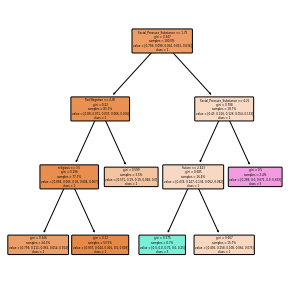

In [ ]:
features = []
for col in x_train.columns:
    features.append(col)
print(features)
classes = ['1','2','3','4','5']

plt.figure(figsize=(5, 5))
plot_tree(clf,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True); # Disp

plt.savefig('dt_f.png')

In [5]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split = 10, random_state = 98,max_depth = 3)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.02)


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split = 10, random_state = 98)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.74 (+/- 0.05)


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split = 20, random_state = 80)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.77 (+/- 0.04)


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split = 30, random_state = 80)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.03)


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split = 40, random_state = 80)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.03)


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split = 50, random_state = 80)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.03)


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split = 70, random_state = 80)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.02)


In [ ]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split = 10, random_state = 92)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.74 (+/- 0.05)


In [ ]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split = 20, random_state = 99)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.78 (+/- 0.03)


In [ ]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split = 30, random_state = 99)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.79 (+/- 0.03)


In [ ]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split = 40, random_state = 99)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.79 (+/- 0.02)


In [ ]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split = 70, random_state = 99)
scores = cross_val_score(dt, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.02)


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', min_samples_split = 10, random_state = 99)
scores = cross_val_score(rf, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.82 (+/- 0.01)


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', min_samples_split = 80, random_state = 99)
scores = cross_val_score(rf, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.01)


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', min_samples_split = 60, random_state = 99)
scores = cross_val_score(rf, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.01)


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, criterion='entropy', min_samples_split = 10, random_state = 90)
scores = cross_val_score(rf, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.82 (+/- 0.01)


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, criterion='entropy', min_samples_split = 60, random_state = 91)
scores = cross_val_score(rf, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.01)


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, criterion='entropy', min_samples_split = 80, random_state = 79)
scores = cross_val_score(rf, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.01)


In [ ]:
gb = GradientBoostingClassifier(n_estimators = 100,
                                criterion='squared_error',
                                min_samples_split = 20,
                                random_state = 99,
                                learning_rate = 0.001)

scores = cross_val_score(rf, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.01)


In [ ]:
gb = GradientBoostingClassifier(n_estimators = 100,
                                criterion='squared_error',
                                min_samples_split = 20,
                                random_state = 99,
                                learning_rate = 0.01)

scores = cross_val_score(rf, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.01)


In [ ]:
gb = GradientBoostingClassifier(n_estimators = 100,
                                criterion='squared_error',
                                min_samples_split = 20,
                                random_state = 99,
                                learning_rate = 0.1)

scores = cross_val_score(rf, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.01)


In [ ]:
le = LabelEncoder()
y_new = le.fit_transform(y)
model = xgb.XGBClassifier(n_estimators = 100, min_samples_split = 20, random_state = 99, learning_rate = 0.001)
scores = cross_val_score(model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.03)


In [ ]:
le = LabelEncoder()
y_new = le.fit_transform(y)
model = xgb.XGBClassifier(n_estimators = 100, min_samples_split = 20, random_state = 99, learning_rate = 0.01)
scores = cross_val_score(model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.03)


In [ ]:
le = LabelEncoder()
y_new = le.fit_transform(y)
model = xgb.XGBClassifier(n_estimators = 100, min_samples_split = 20, random_state = 99, learning_rate = 0.1)
scores = cross_val_score(model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.04)


In [ ]:
le = LabelEncoder()
y_new = le.fit_transform(y)
model = xgb.XGBClassifier(n_estimators = 1000, min_samples_split = 20, random_state = 99, learning_rate = 0.001)
scores = cross_val_score(model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.03)


In [ ]:
le = LabelEncoder()
y_new = le.fit_transform(y)
model = xgb.XGBClassifier(n_estimators = 1000, min_samples_split = 20, random_state = 69, learning_rate = 0.01)
scores = cross_val_score(model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.04)


In [ ]:
y_new = le.fit_transform(y)
model = xgb.XGBClassifier(n_estimators = 1000, min_samples_split = 20, random_state = 69, learning_rate = 0.1)
scores = cross_val_score(model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.78 (+/- 0.03)


In [ ]:
y_new = le.fit_transform(y)
model = xgb.XGBClassifier(n_estimators = 1000, min_samples_split = 70, random_state = 59, learning_rate = 0.01)
scores = cross_val_score(model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.04)


In [ ]:
y_new = le.fit_transform(y)
model = xgb.XGBClassifier(n_estimators = 1000, min_samples_split = 20, random_state = 29, learning_rate = 0.0001)
scores = cross_val_score(model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.03)


In [ ]:
le = LabelEncoder()
y_new = le.fit_transform(y)
model = xgb.XGBClassifier(n_estimators = 1000, min_samples_split = 20, random_state = 99, learning_rate = 0.0001)
scores = cross_val_score(model, X, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.03)


In [ ]:
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.32 (+/- 0.15)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.20,
                                   shuffle=True)
y_test = y_test.to_numpy() - 1
y_train = y_train.to_numpy() - 1
print(y_test)
print(y_train)

[0 0 1 4 0 0 0 0 0 4 0 3 0 1 0 0 1 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 4 0 0 0 0 0 0 0 0 1 4 4 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 4 0 0 0 0 0
 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 4 1 0 0 0 4 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2
 0]
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0
 0 4 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 4 0 0 0 0 1 0 0 2 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 3 1 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 4 0 0 2 0 0 4 0 2 0 0
 2 0 0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 3 0 0 0 0 0 0 0 0 2
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 4 0 0 0 0 3 0 0 1 0 2 0 2 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 4 0 0 4
 0 1 0 2 0 0 0 0 0 0 0 0 0 0 4 0 0 0 1 3 1 0 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 4 1 0 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 2 0 2 1 0 0
 1 1 2 0 0 0 4 0 0 0 

In [ ]:
model = Sequential()
model.add((Dense(10,activation='relu',input_shape=(x_train.shape[1:]))))
model.add((Dense(5,activation='softmax')))
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                230       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
38/38 [==============================] - 2s 21ms/step - loss: 8.3343 - accuracy: 0.0438 - val_loss: 4.4349 - val_accuracy: 0.0403
Epoch 2/100
38/38 [==============================] - 0s 8ms/step - loss: 1.9026 - accuracy: 0.4283 - val_loss: 1.0472 - val_accuracy: 0.7987
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.9579 - accuracy: 0.8044 - val_loss: 0.9676 - val_accuracy: 0.7919
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.8949 - accuracy: 0.7943 - val_loss: 0.9373 - val_accuracy: 0.7919
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 0.8673 - accuracy: 0.8010 - val_loss: 0.9079 - val_accuracy: 0.7987
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.8424 - accuracy: 0.7943 - val_loss: 0.8864 - val_accuracy: 0.8054
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.8206 - accuracy: 0.8027 - val_loss: 0.8634 - val_accuracy: 0.8054
Epoch 8/100


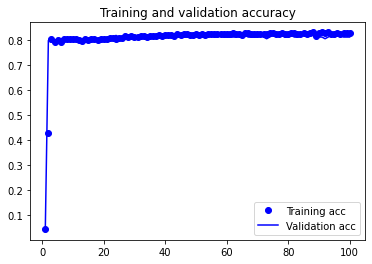

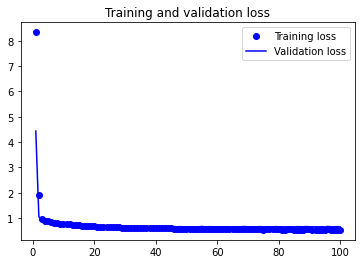

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test,y_test) ,batch_size = 16)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()